In [1]:
from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = 'Toggle show/hide'  
    target_cell = this_cell  
    js_hide_current = ''
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}
            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )
    return HTML(html)

In [2]:
def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)  

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

In [4]:
train = pd.read_csv('.\Data\Train.csv')

In [5]:
test = pd.read_csv('.\Data\Test.csv')

In [6]:
submission = pd.read_csv('.\Data\sample_submission.csv')

# EDA (Exploratory Data Analysis)

In [7]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [8]:
train.shape

(8068, 11)

In [9]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [10]:
test.shape

(2627, 10)

In [11]:
submission.head()

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [13]:
#sns.pairplot(train, hue='Segmentation')

In [14]:
#sns.pairplot(train)

In [15]:
train.index

RangeIndex(start=0, stop=8068, step=1)

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


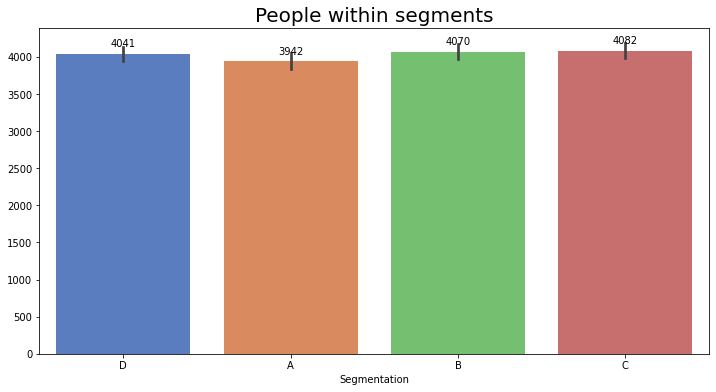

In [16]:
#Relation between weather and count of bike rentals
plt.figure(figsize=(12, 6))
segment_count = sns.barplot('Segmentation',train.index,palette="muted",data=train)
plt.title('People within segments', size=20)

add_value_labels(segment_count, typ='bar')
plt.show()

In [17]:
fig = plt.figure(figsize=(12,6))
#sns.heatmap(train.corr(), cmap='PiYG', vmin=-1, annot=True)

<Figure size 864x432 with 0 Axes>

In [40]:
A = 'red'
B = 'blue'
C = 'purple'
D = 'Green'

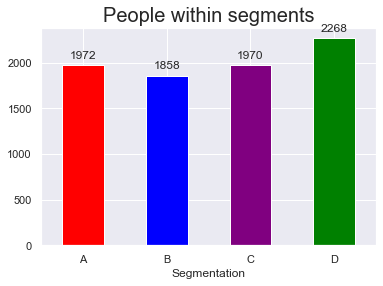

In [159]:
sns.set()
plt.figure(figsize=(6, 4))
plt.title('People within segments', size=20)
count = train.groupby('Segmentation')['ID'].agg('count').plot(kind='bar', color=[A, B, C, D])
add_value_labels(count, typ='bar');
degrees = 0
plt.xticks(rotation=degrees);
plt.savefig('.\Plots/People_within_segments.png', dpi = 75);

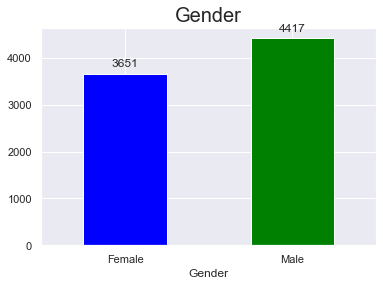

In [160]:
sns.set()
plt.figure(figsize=(6, 4))
plt.title('Gender', size=20)
gender = train.groupby('Gender')['ID'].agg('count').plot(kind='bar', color=['blue', 'green'])
add_value_labels(gender, typ='bar');
degrees = 0
plt.xticks(rotation=degrees);
plt.savefig('.\Plots/gender.png', dpi = 75);

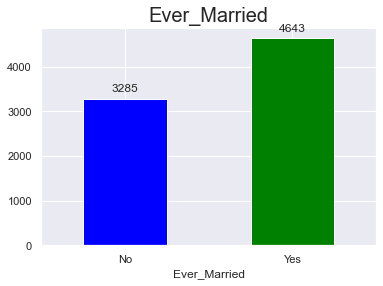

In [161]:
sns.set()
plt.figure(figsize=(6, 4))
plt.title('Ever_Married', size=20)
gender = train.groupby('Ever_Married')['ID'].agg('count').plot(kind='bar', color=['blue', 'green'])
add_value_labels(gender, typ='bar');
degrees = 0
plt.xticks(rotation=degrees);
plt.savefig('.\Plots/ever_married.png', dpi = 75);

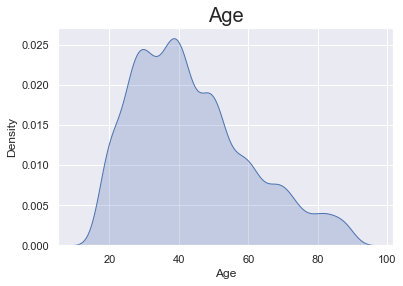

In [183]:
sns.set()
plt.figure(figsize=(6, 4))
plt.title('Age', size=20)
sns.kdeplot(data=train, x = 'Age', shade=True)
plt.savefig('.\Plots/age.png', dpi = 75);




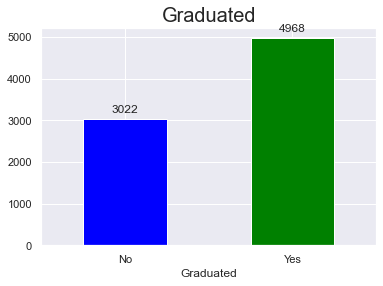

In [163]:
sns.set()
plt.figure(figsize=(6, 4))
plt.title('Graduated', size=20)
gender = train.groupby('Graduated')['ID'].agg('count').plot(kind='bar', color=['blue', 'green'])
add_value_labels(gender, typ='bar');
degrees = 0
plt.xticks(rotation=degrees);
plt.savefig('.\Plots/graduated.png', dpi = 75);

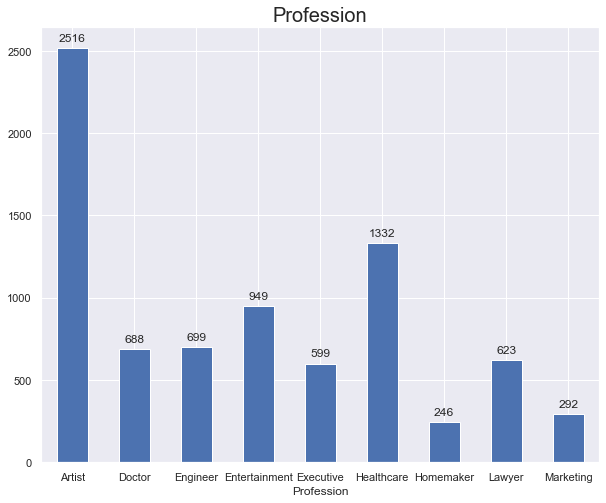

In [164]:
sns.set()
plt.figure(figsize=(10, 8))
plt.title('Profession', size=20)
gender = train.groupby('Profession')['ID'].agg('count').plot(kind='bar')
add_value_labels(gender, typ='bar');
degrees = 0
plt.xticks(rotation=degrees);
plt.savefig('.\Plots/profession.png', dpi = 75);

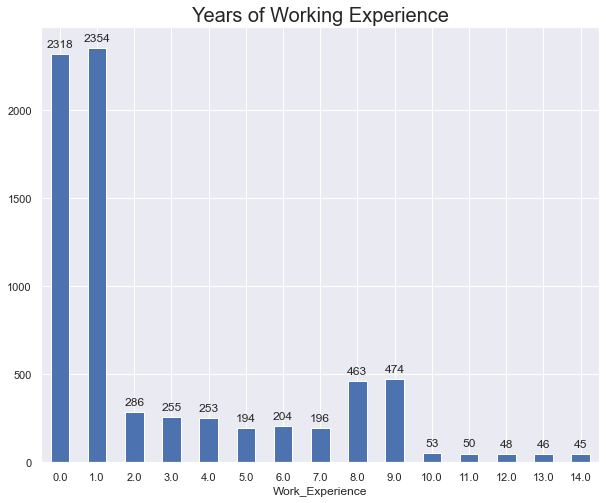

In [105]:
sns.set()
plt.figure(figsize=(10, 8))
plt.title('Years of Working Experience', size=20)
gender = train.groupby('Work_Experience')['ID'].agg('count').plot(kind='bar')
add_value_labels(gender, typ='bar');
degrees = 0
plt.xticks(rotation=degrees);

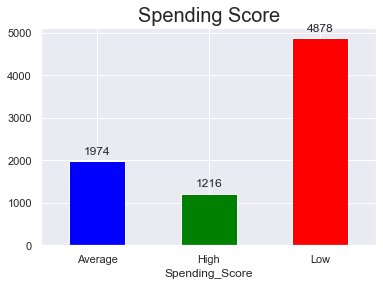

In [165]:
sns.set()
plt.figure(figsize=(6, 4))
plt.title('Spending Score', size=20)
spending = train.groupby('Spending_Score')['ID'].agg('count').plot(kind='bar', color=['blue', 'green', 'red'])
add_value_labels(spending, typ='bar');
labels = ['Low', 'Average', 'High']
plt.xticks(rotation=degrees);
plt.savefig('.\Plots/spending_score.png', dpi = 75);

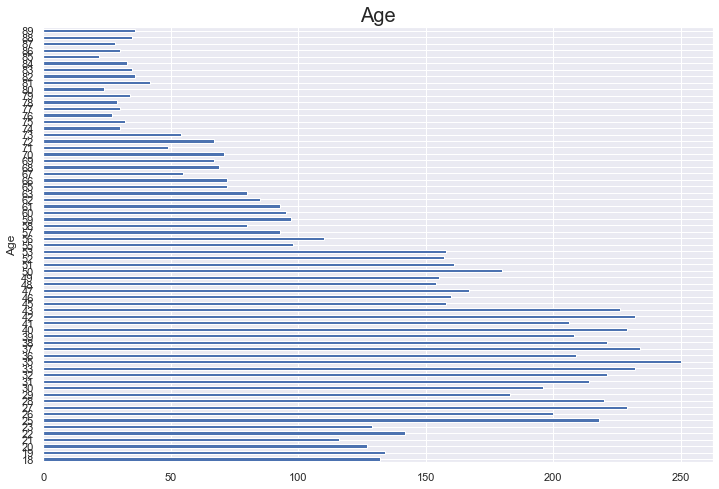

In [178]:
sns.set()
plt.figure(figsize=(12, 8))
plt.title('Age', size=20)
spending = train.groupby('Age')['ID'].agg('count').plot(kind='barh')

labels = ['Low', 'Average', 'High']
plt.xticks(rotation=degrees);


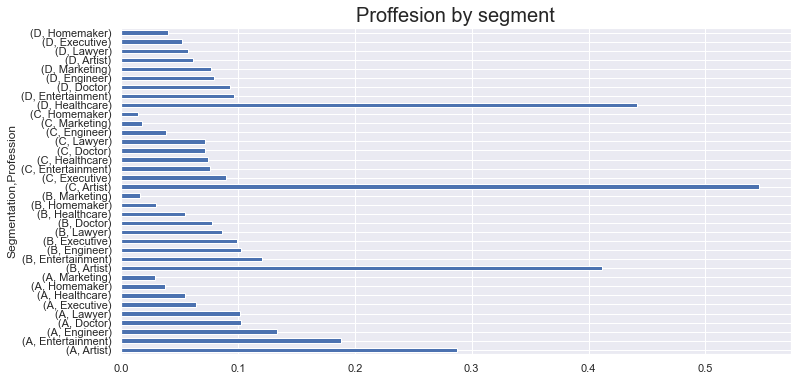

In [177]:
fig = plt.figure(figsize=(12,6))
plt.title('Proffesion by segment', size=20)
train.groupby(train.Segmentation).Profession.value_counts(normalize=True).plot(kind='barh')
plt.savefig('.\Plots/Proffesion_by_Segment.png', dpi = 100);

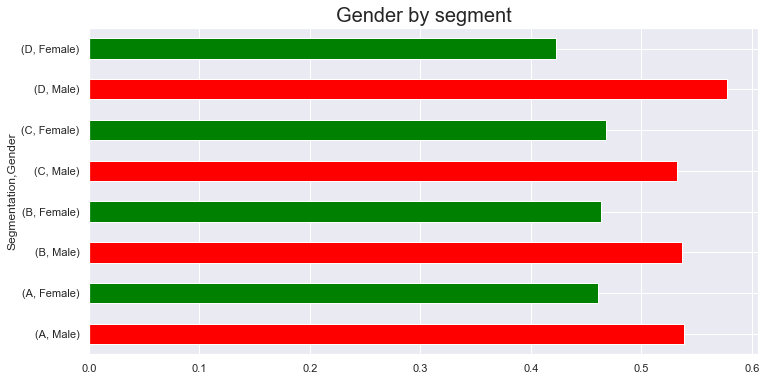

In [172]:
fig = plt.figure(figsize=(12,6))
plt.title('Gender by segment', size=20)
train.groupby(train.Segmentation).Gender.value_counts(normalize=True).plot(kind='barh',color=['red', 'green'])
plt.savefig('.\Plots/Gender_by_Segment.png', dpi = 100);

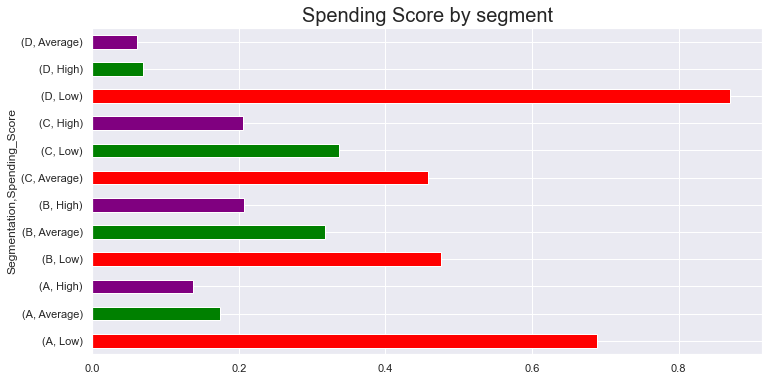

In [180]:
fig = plt.figure(figsize=(12,6))
plt.title('Spending Score by segment', size=20)
train.groupby(train.Segmentation).Spending_Score.value_counts(normalize=True).plot(kind='barh',color=['red', 'green', 'purple'])
plt.savefig('.\Plots/Spending_by_Segment.png', dpi = 100);

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


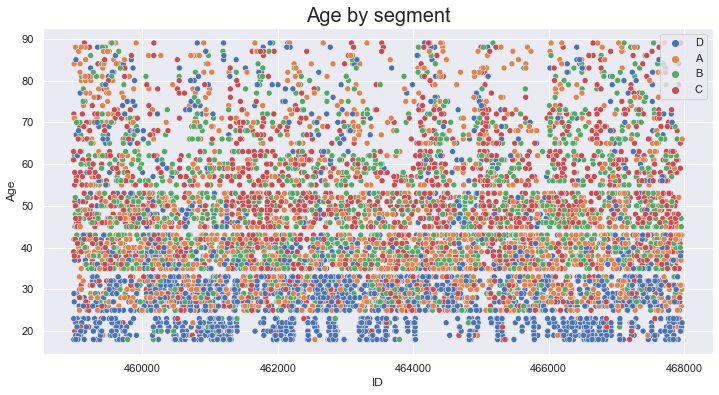

In [182]:
fig = plt.figure(figsize=(12,6))
plt.title('Age by segment', size=20)
sns.scatterplot(train.ID, train.Age,  hue=train.Segmentation, legend='full')
plt.savefig('.\Plots/Age_Segment.png', dpi = 100);
plt.legend()

In [ ]:
plt.figure(figsize=(9, 4))
proffession = sns.barplot('Profession',train.index, palette="muted",data=train, orient='v')
plt.title('Professions ', size=18)

add_value_labels(proffession, typ='bar')
plt.show()

In [ ]:
plt.hist(train.Segmentation);

In [ ]:
train.columns

In [ ]:
train.Gender.value_counts(normalize=True)

In [ ]:
train.Profession.value_counts(normalize=True)

In [ ]:
train.Graduated.value_counts(normalize=True)

In [ ]:
train.Family_Size.value_counts(normalize=True)

In [ ]:
train.pivot_table(index=train.Segmentation, aggfunc='count')

In [ ]:
train['Spending_Score'].agg(pd.Series.mode)

In [ ]:
segmentation = train.pivot_table(index=train.Segmentation, aggfunc={'Work_Experience' : 'mean',
                                                                    'Age': 'mean',
                                                                    'Family_Size':'mean'})

In [ ]:
spending = train.groupby(train.Segmentation)['Spending_Score'].agg(pd.Series.mode)

In [ ]:
married = train.groupby(train.Segmentation)['Ever_Married'].agg(pd.Series.mode)

In [ ]:
graduated = train.groupby(train.Segmentation)['Graduated'].agg(pd.Series.mode)

In [ ]:
profession =  train.groupby(train.Segmentation)['Profession'].agg(pd.Series.mode)


In [ ]:
gender = train.groupby(train.Segmentation)['Gender'].agg(pd.Series.mode)

In [ ]:
count = train.groupby(train.Segmentation)['ID'].agg('count')

In [ ]:
var = train.groupby(train.Segmentation)['Var_1'].agg(pd.Series.mode)

In [ ]:
segmentation = pd.concat([segmentation, spending], axis=1)

In [ ]:
segmentation = pd.concat([segmentation, married], axis=1)

In [ ]:
segmentation = pd.concat([segmentation, graduated], axis=1)

In [ ]:
segmentation = pd.concat([segmentation, profession], axis=1)

In [ ]:
segmentation = pd.concat([segmentation, var], axis=1)

In [ ]:
segmentation = pd.concat([segmentation, count], axis=1)

In [ ]:
segmentation = pd.concat([segmentation, gender], axis=1)

In [ ]:
segmentation

In [ ]:
train.columns

In [ ]:
train.groupby(train.Segmentation).Graduated.value_counts()

In [ ]:
train.groupby(train.Segmentation).Gender.value_counts(normalize=True).plot(kind='barh')

In [ ]:
train.groupby(train.Segmentation).Gender.value_counts(normalize=True)

In [ ]:
fig = plt.figure(figsize=(12,6))
train.groupby(train.Segmentation).Spending_Score.value_counts(normalize=True).plot(kind='barh')

In [ ]:
fig = plt.figure(figsize=(12,6))
train.groupby(train.Segmentation).Profession.value_counts(normalize=True).plot(kind='barh')
hide_toggle()

In [ ]:
fig = plt.figure(figsize=(12,6))
train.groupby(train.Segmentation).Family_Size.value_counts(normalize=True).plot(kind='barh')

In [ ]:
train.ID.count()

In [ ]:
train

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ID', ylabel='Age'>

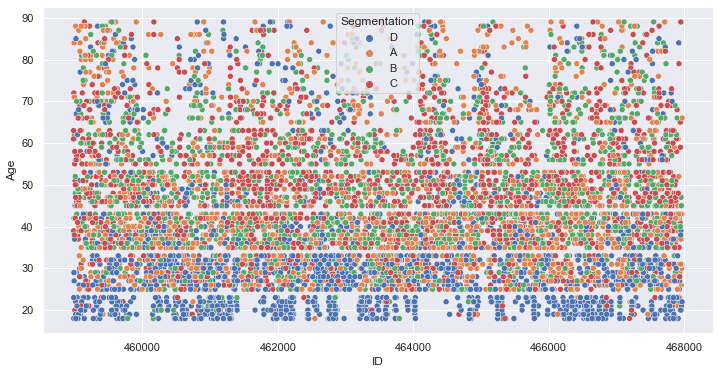

In [144]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(train.ID, train.Age,  hue=train.Segmentation)

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(train.ID, train.Profession, hue=train.Segmentation)

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(train.ID, train.Spending_Score, hue=train.Segmentation)

In [ ]:
fig = plt.figure(figsize=(12,6))
train.groupby(train.Segmentation).Gender.value_counts(normalize=True).plot(kind='barh')

In [ ]:
train.loc[train['Segmentation']=='A'].groupby(train.Segmentation).agg('count')

In [ ]:
segmentation.rename(columns={'ID' : 'Count'}, inplace=True)

In [ ]:
segmentation

In [ ]:
train['Var_1'] = train['Var_1'].str.replace('Cat_', '')

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
train['Var_1'].isna()==False

In [ ]:
train['Var_1'].notna()


In [ ]:
train['Var_1'] = train.loc[train['Var_1'].isna()==False]['Var_1'].apply(lambda x : int(x))

In [ ]:
train['Var_1'].isna().sum()

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='PiYG', vmin=-1, annot=True)

In [ ]:
train.Segmentation.unique()

In [ ]:
dct = {'A':1, 'B':2 , 'C':3, 'D':4}

In [ ]:
train['Segmentation'] = train['Segmentation'].map(dct)

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='PiYG', vmin=-1, annot=True)

In [ ]:
train.Gender.unique()

In [ ]:
train['Gender'] = train['Gender'].map({'Male':0, 'Female':1})

In [ ]:
train['Gender']

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='PiYG', vmin=-1, annot=True)

In [ ]:
train

In [ ]:
train.Ever_Married.unique()

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
train['Ever_Married'] = train['Ever_Married'].map({'No':0, 'Yes':1})

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
train.Graduated.unique()

In [ ]:
train['Graduated'] = train['Graduated'].map({'No':0, 'Yes':1})

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
train

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='PiYG', vmin=-1, annot=True)

In [ ]:
train.Spending_Score.unique()

In [ ]:
train['Spending_Score'] = train['Spending_Score'].map({'Low':1, 'Average':2, 'High':3 })

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='PiYG', vmin=-1, annot=True)

In [ ]:
train.Profession.unique()

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
dct2 = {'Healthcare' : 0, 'Engineer':1, 'Lawyer':2, 'Entertainment':3, 'Artist':4,
       'Executive':5, 'Doctor':6, 'Homemaker':7, 'Marketing':8}

In [ ]:
train['Profession'] = train['Profession'].map(dct2)

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='PiYG', vmin=-1, annot=True)

In [ ]:
train

In [ ]:
train.corrwith(train['Segmentation']).abs().sort_values(ascending=False)

In [ ]:

sns.pairplot(train, hue='Segmentation', palette=("hls"))

## EDA Conclussions 

1. Segmentation:
    * 1.1 I was not able to figure out what are the filters needed to be part of every segment. Below a table with the average for the numerical variables and the mode for the categorical variables:
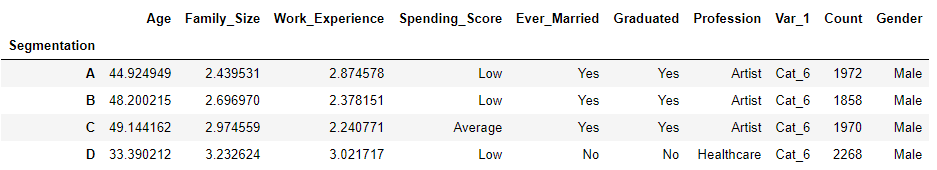
    * 1.2 The group D is having a lower Age Average  and the Mode for the proffesion is Healthcare. 
    * 1.3 The group C is haaving an Spending Score Higher, Proffesion is having a higher volume of Artists comparing with other segments. 
 
2. Proffesion: 
    * Artist 37%
    * Healthcare 16% 
    * Entertaiment 11%
 
3. Gender:
    * Male 54 %
    * Female 45%
4. Graduated:
    * Yes 62%
    * No 37%

5. Family Size: 
    * 2 - 30%
    * 3 - 19%
    * 1 - 18%
    * 4 - 17%
  
6. Correlation: 
   * 6.1 Correlation related to the Segmentation
       * Even Married
       * Age
       * Graduated
       * Family Size
  * 6.2 Correlation related Spending Code
       * Ever Married 
       * Age

## Data Cleaning - Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill.
